# Movie Recommendation using Surprise

## What a Surprise!
Surprise proporciona el método de Factorización Matricial necesario para implementar el Filtrado Colaborativo.

Surprise consta de tres módulos principales.

* Conjunto de datos: Un módulo para cargar, preprocesar y transformar datos. Surprise puede manejar datos en varios formatos. Por ejemplo, CSV, tsv, pandas DataFrame, o un archivo de datos en un formato que usted mismo defina.

* Algoritmo: Un módulo para implementar algoritmos de recomendación. Surprise ofrece varios algoritmos como SVD, NMF, PMF, Slope One, KNN Basic, KNN With Means, KNN With Z-Score, BaselineOnly, CoClustering.

* Evaluación: Un módulo para evaluar el rendimiento de los algoritmos de recomendación. Surprise proporciona varias métricas de evaluación como Cross-validation, Train-test split, Precision, Recall, F1-score, RMSE, MAE, MAPE, Coverage, etc.

Traducción realizada con la versión gratuita del traductor DeepL.com

## Método de Factorización Matricial para el Filtrado Colaborativo
La Factorización Matricial es una técnica popular utilizada en el filtrado colaborativo para predecir las valoraciones usuario-artículo basándose en las valoraciones previas dadas por los usuarios. El filtrado colaborativo es un tipo de sistema de recomendación que se basa en el comportamiento anterior de usuarios/artículos similares para hacer recomendaciones.

La factorización de matrices se basa en la idea de descomponer la matriz de valoraciones usuario-artículo en dos matrices de menor dimensión: una representa a los usuarios y la otra a los artículos. La representación de menor dimensión captura los factores latentes o características que influyen en la preferencia de un usuario por un artículo. Los factores pueden incluir, por ejemplo, el género de la película, el director, los actores, o la edad, el sexo, etc. del usuario.

Traducción realizada con la versión gratuita del traductor DeepL.com


In [1]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 10.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3162992 sha256=8212e929b867f538f17f96d0ed641f92ef16ae4f45803d46a465623b486f5a19
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [2]:
import os
import random
import operator
import requests
import numpy as np
import pandas as pd
from scipy import sparse
import sys
from surprise import Dataset, Reader
from surprise import KNNBasic, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy
from surprise.dataset import DatasetAutoFolds
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
URL = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTf8DbhhhC9Vb89GsgLayPQ_YC8A5EruAq_a8Wwb0ZIvy1LzfpyazoeC8-bCs2Xswk4HYu5Ejoq32U_/pub?gid=1594088694&single=true&output=csv'

In [5]:
data = pd.read_csv(URL)
data.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [8]:
print(len(data))
print(data['rating'].unique().tolist())
print(len(data['userId'].unique().tolist()))
print(len(data['movieId'].unique().tolist()))

100836
[4.0, 5.0, 3.0, 2.0, 1.0, 4.5, 3.5, 2.5, 0.5, 1.5]
610
9724


## Pandas DataFrame to Surprise Dataset

In [9]:
reader = Reader(rating_scale=(0,5))

data = Dataset.load_from_df(data[['userId', 'movieId', 'rating']], reader)

print(type(data))

<class 'surprise.dataset.DatasetAutoFolds'>


In [10]:
# Split the data into training and testing sets
trainset, testset = train_test_split(data, test_size=0.25)
print(type(trainset))

<class 'surprise.trainset.Trainset'>


In [11]:
import itertools

for uid, iid, rating in itertools.islice(trainset.all_ratings(), 5):
  print(f"User {uid} rated item {iid} with a rating of {rating}")

print()
for uid, iid, rating in testset[:5]:
  print(f"User {uid} rated item {iid} with a rating of {rating}")

print()
print(trainset.n_ratings, len(testset))

User 0 rated item 0 with a rating of 5.0
User 0 rated item 433 with a rating of 1.0
User 0 rated item 967 with a rating of 4.0
User 0 rated item 117 with a rating of 2.0
User 0 rated item 497 with a rating of 2.0

User 606 rated item 2367 with a rating of 3.5
User 610 rated item 34323 with a rating of 4.0
User 51 rated item 4340 with a rating of 2.5
User 268 rated item 260 with a rating of 4.0
User 322 rated item 4010 with a rating of 3.0

75627 25209


## SVD (Singular Value Decomposition)
* Extrae características latentes entre usuarios y artículos descomponiendo el conjunto de datos en un espacio de baja dimensión.
* Es eficiente desde el punto de vista computacional en comparación con los algoritmos de filtrado colaborativo basados en memoria, por lo que también es adecuado para grandes conjuntos de datos.
* Es necesario ajustar muchos parámetros, como el número de elementos a recomendar y cómo se calcula la similitud de los elementos.

In [12]:
# Use the SVD algorithm to train the model
svd_model = SVD()
svd_model.fit(trainset)

In [13]:
# Test the model on the testing set
predictions = svd_model.test(testset)

In [14]:
for uid, iid, rating in testset[:5]:
  print(f"User {uid} rated item {iid} with a rating of {rating}")

User 606 rated item 2367 with a rating of 3.5
User 610 rated item 34323 with a rating of 4.0
User 51 rated item 4340 with a rating of 2.5
User 268 rated item 260 with a rating of 4.0
User 322 rated item 4010 with a rating of 3.0


Las **'predicciones'** son una lista de tuplas de la forma (usuario, artículo, calificación_actual, calificación_prevista, detalles). El valor de predicted_rating es est.

In [15]:
for prediction in predictions[0:5]:
  print(prediction)

user: 606        item: 2367       r_ui = 3.50   est = 3.04   {'was_impossible': False}
user: 610        item: 34323      r_ui = 4.00   est = 3.78   {'was_impossible': False}
user: 51         item: 4340       r_ui = 2.50   est = 3.23   {'was_impossible': False}
user: 268        item: 260        r_ui = 4.00   est = 3.43   {'was_impossible': False}
user: 322        item: 4010       r_ui = 3.00   est = 2.98   {'was_impossible': False}


In [16]:
# Print the performance metrics
accuracy.rmse(predictions)

RMSE: 0.8816


0.8816246478960099

In [17]:
true_ratings = [pred.r_ui for pred in predictions]
est_ratings = [pred.est for pred in predictions]
uids = [pred.uid for pred in predictions]

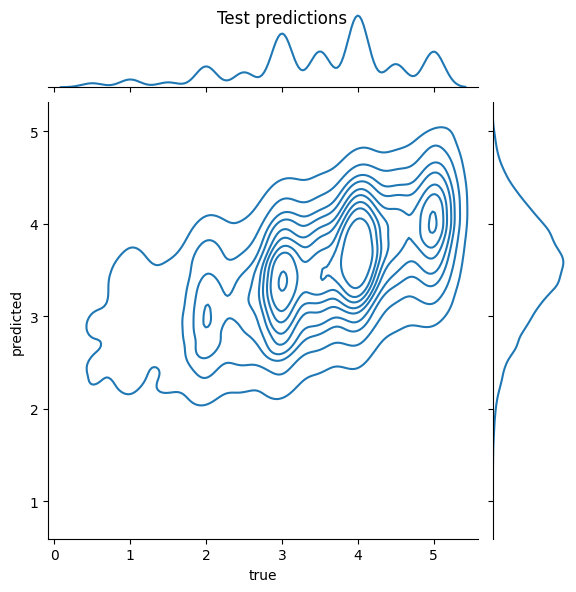

In [18]:
data = pd.DataFrame(columns=["true","predicted"])
data["true"]=true_ratings
data["predicted"]=est_ratings
g = sns.jointplot(data=data,x="true", y="predicted", kind="kde",)
g.fig.suptitle('Test predictions',fontsize=12)
plt.show()

## Recommend unseen movies for test set users

In [19]:
users=list(set(uids))
print(users[0:5])

[1, 2, 3, 4, 5]


In [20]:
movie_URL = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQkPpgtCuGP7qiUn6BPYAQBhINwju81jwFFD59DOUeR81tfCwJKpsupmsEMCSdNi6PiqtUljuG8DLaw/pub?gid=1235402153&single=true&output=csv'

In [21]:
movie = pd.read_csv(movie_URL)
mapping = dict(zip(movie['movieId'], movie['title']))

In [22]:
movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [23]:
# items which the user not yet evaluate
items = trainset.build_anti_testset()
for user in users[0:5]:
  user_items = list(filter(lambda x: x[0] == user, items))
  print()
  print(user,len(user_items))
  # Generate recommendation
  recommendations = svd_model.test(user_items)
  recommendations.sort(key=operator.itemgetter(3), reverse=True)
  print(f"User {user} recommendations:")
  for r in recommendations[0:5]:
    print(f" [Title] {mapping[r[1]]}, [Estimated Rating] {round(r[3],3)}")


1 8563
User 1 recommendations:
 [Title] Goodfellas (1990), [Estimated Rating] 5
 [Title] Memento (2000), [Estimated Rating] 5
 [Title] Lord of the Rings: The Return of the King, The (2003), [Estimated Rating] 5
 [Title] Apocalypse Now (1979), [Estimated Rating] 5
 [Title] Blade Runner (1982), [Estimated Rating] 5

2 8714
User 2 recommendations:
 [Title] Lawrence of Arabia (1962), [Estimated Rating] 4.664
 [Title] Casablanca (1942), [Estimated Rating] 4.611
 [Title] Godfather, The (1972), [Estimated Rating] 4.512
 [Title] Spirited Away (Sen to Chihiro no kamikakushi) (2001), [Estimated Rating] 4.486
 [Title] Bound (1996), [Estimated Rating] 4.478

3 8710
User 3 recommendations:
 [Title] Requiem for a Dream (2000), [Estimated Rating] 4.167
 [Title] American Beauty (1999), [Estimated Rating] 4.16
 [Title] Silence of the Lambs, The (1991), [Estimated Rating] 3.986
 [Title] Casablanca (1942), [Estimated Rating] 3.892
 [Title] Reservoir Dogs (1992), [Estimated Rating] 3.85

4 8585
User 4 re

## KNNBasic (k-Nearest Neighbors)
* Basándose en la similitud de usuarios y artículos, encuentra los usuarios y artículos más similares y recomienda los artículos que podrían gustarles.
* La eficiencia computacional es relativamente alta, por lo que es adecuado para conjuntos de datos pequeños.
* El número de parámetros es relativamente pequeño, por lo que es fácil de ajustar.

In [24]:
# Use the SVD algorithm to train the model
knnb_model = KNNBasic()
knnb_model.fit(trainset)

Computing the msd similarity matrix...
Done computing similarity matrix.


In [25]:
# Test the model on the testing set
predictions = knnb_model.test(testset)

In [26]:
for uid, iid, rating in testset[:5]:
  print(f"User {uid} rated item {iid} with a rating of {rating}")

User 606 rated item 2367 with a rating of 3.5
User 610 rated item 34323 with a rating of 4.0
User 51 rated item 4340 with a rating of 2.5
User 268 rated item 260 with a rating of 4.0
User 322 rated item 4010 with a rating of 3.0


In [27]:
for prediction in predictions[0:5]:
  print(prediction)

user: 606        item: 2367       r_ui = 3.50   est = 2.63   {'actual_k': 11, 'was_impossible': False}
user: 610        item: 34323      r_ui = 4.00   est = 3.73   {'actual_k': 4, 'was_impossible': False}
user: 51         item: 4340       r_ui = 2.50   est = 2.02   {'actual_k': 4, 'was_impossible': False}
user: 268        item: 260        r_ui = 4.00   est = 4.07   {'actual_k': 40, 'was_impossible': False}
user: 322        item: 4010       r_ui = 3.00   est = 2.68   {'actual_k': 6, 'was_impossible': False}


In [28]:
# Print the performance metrics
accuracy.rmse(predictions)

RMSE: 0.9595


0.9595441154862961

In [29]:
true_ratings = [pred.r_ui for pred in predictions]
est_ratings = [pred.est for pred in predictions]
uids = [pred.uid for pred in predictions]

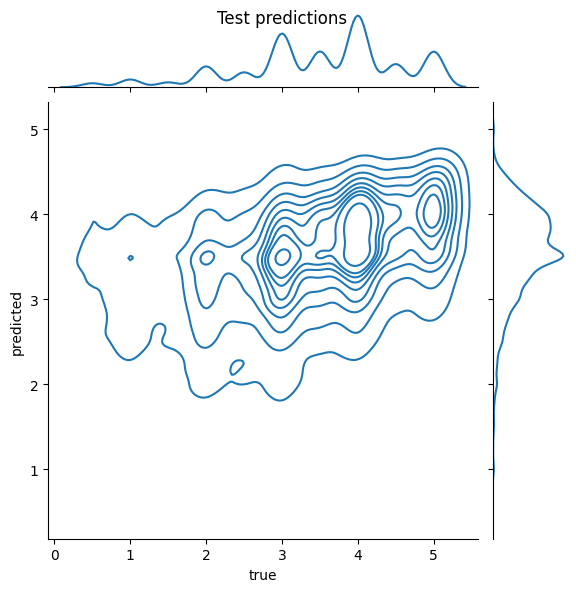

In [30]:
data = pd.DataFrame(columns=["true","predicted"])
data["true"]=true_ratings
data["predicted"]=est_ratings
g = sns.jointplot(data=data,x="true", y="predicted", kind="kde",)
g.fig.suptitle('Test predictions',fontsize=12)
plt.show()

In [31]:
# items which the user not yet evaluate
items = trainset.build_anti_testset()
for user in users[0:5]:
  user_items = list(filter(lambda x: x[0] == user, items))
  print()
  print(user,len(user_items))
  # Generate recommendation
  recommendations = knnb_model.test(user_items)
  recommendations.sort(key=operator.itemgetter(3), reverse=True)
  print(f"User {user} recommendations:")
  for r in recommendations[0:5]:
    print(f" [Title] {mapping[r[1]]}, [Estimated Rating] {round(r[3],3)}")


1 8563
User 1 recommendations:
 [Title] Little Murders (1971), [Estimated Rating] 5
 [Title] The Big Bus (1976), [Estimated Rating] 5
 [Title] Kung Fu Panda: Secrets of the Masters (2011), [Estimated Rating] 5
 [Title] Wonder Woman (2009), [Estimated Rating] 5
 [Title] My Life as McDull (Mak dau goo si) (2001), [Estimated Rating] 5

2 8714
User 2 recommendations:
 [Title] Colonel Chabert, Le (1994), [Estimated Rating] 5
 [Title] The Big Bus (1976), [Estimated Rating] 5
 [Title] Kung Fu Panda: Secrets of the Masters (2011), [Estimated Rating] 5
 [Title] Wonder Woman (2009), [Estimated Rating] 5
 [Title] Nine Lives of Tomas Katz, The (2000), [Estimated Rating] 5

3 8710
User 3 recommendations:
 [Title] Little Murders (1971), [Estimated Rating] 5
 [Title] The Big Bus (1976), [Estimated Rating] 5
 [Title] Wonder Woman (2009), [Estimated Rating] 5
 [Title] Dolls (2002), [Estimated Rating] 5
 [Title] My Life as McDull (Mak dau goo si) (2001), [Estimated Rating] 5

4 8585
User 4 recommendati